In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
## Those are the libraries that we will use to create our model and train it.


In [5]:
##First, we will import the dataset.
data = pd.read_csv('train.csv')

#Must convert pandas dataframe to numpy array for matrix algebra.

data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [6]:
#One hot encoding the output.

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [7]:
#  Model architecture
##  Input layer: 784 neurons (28x28 pixels) (784 inputs)
##  Hidden layer: 100 neurons (ReLU activation)
##  Output layer: 10 neurons (0-9) (Softmax activation) 



# Implementation:
#  step 1: Initialize weights and biases
#  step 2: Forward propagation
#  step 3: Backpropagation
#  step 4: Update weights and biases
 
 
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0


def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha): #step 4
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1,b1,W2,b2
    


In [8]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [9]:
  #now implementing gradient descent.
def gradient_descent(X_train, Y_train, alpha, num_iter):
    W1,b1,W2,b2 = init_params()
    for i in range(num_iter):
        Z1,A1,Z2,A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1,db1,dW2,db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X_train, Y_train)
        W1,b1,W2,b2 = update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha)
        ## Output logging to help debug and see the training progress.  
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y_train))
    return W1, b1, W2, b2

In [12]:
W1,b1, W2,b2 = gradient_descent(X_train, Y_train, .15, 800)

Iteration:  0
[2 5 5 ... 4 1 4] [1 7 5 ... 0 1 2]
0.13531707317073172
Iteration:  10
[3 5 7 ... 0 3 8] [1 7 5 ... 0 1 2]
0.2455609756097561
Iteration:  20
[3 7 7 ... 0 1 8] [1 7 5 ... 0 1 2]
0.34573170731707314
Iteration:  30
[3 7 7 ... 0 1 8] [1 7 5 ... 0 1 2]
0.431
Iteration:  40
[2 7 7 ... 0 1 2] [1 7 5 ... 0 1 2]
0.507609756097561
Iteration:  50
[2 7 7 ... 0 1 2] [1 7 5 ... 0 1 2]
0.5711219512195121
Iteration:  60
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.623390243902439
Iteration:  70
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.6632682926829269
Iteration:  80
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.695390243902439
Iteration:  90
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.7204878048780488
Iteration:  100
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.7391463414634146
Iteration:  110
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.7532926829268293
Iteration:  120
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.7657560975609756
Iteration:  130
[1 9 9 ... 0 1 2] [1 7 5 ... 0 1 2]
0.7758048780487805
Iteration:  140
[1 9 9 ... 0 1 

Prediction:  [1]
Label:  1


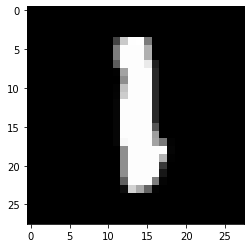

Prediction:  [4]
Label:  7


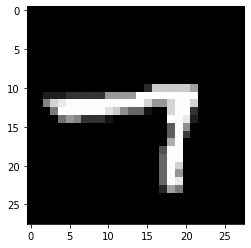

Prediction:  [5]
Label:  5


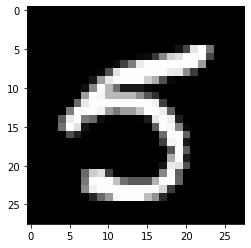

Prediction:  [7]
Label:  7


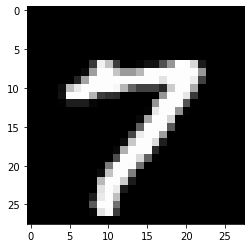

In [13]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
 # Let's look at a couple of examples:

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)